# Router Rescue  

### Description:  
Imagine you're a Cisco engineer tasked with troubleshooting performance issues on a client's network. The client's router is struggling, and you need to dive into the log data to identify the root cause. Your mission is to use your Pandas skills, to analyze the log data, pinpoint the problems, and save the day!

### Tasks:  
- **Extract top 5 error-causing IP addresses** - Identify the IP addresses with the most error messages.  
- **Calculate average response time by hour** - Determine the average response time for each hour of the day.  
- **Error Message Distribution** - Calculate the percentage distribution of each error message type (Timeout, Connection Refused, Packet Loss) in the dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


# The Data  

The dataset consists of 10,000 log entries from a Cisco router, containing timestamps, IP addresses, error messages, and response times. The data spans a month-long period, with various error messages and response times, simulating a real-world scenario where performance issues need to be identified and addressed.    

### Columns:  
- **timestamp:** The date and time of each log entry (datetime64[ns] type)  
- **ip_address:** The IP address associated with each log entry (object type)  
- **error_message:** The error message corresponding to each log entry (object type)  
- **response_time:** The response time for each log entry (float64 type)  

Your task is to use pandas to unravel the mysteries hidden in this log data and help the Cisco engineer optimize the router's performance!

In [2]:
# set the seed
np.random.seed(0)

logs = {
    'timestamp': np.random.choice(pd.date_range('2024-01-01 00:00:00', '2024-01-31 23:00:00', freq='h'), size=10000),
    'ip_address': np.random.choice(['192.168.1.' + str(i) for i in range(1, 100)], size=10000),
    'error_message': np.random.choice(['Timeout', 'Connection Refused', 'Packet Loss'], size=10000),
    'response_time': np.random.uniform(0, 1, size=10000)
}

df = pd.DataFrame(logs)
df.head()

,timestamp,ip_address,error_message,response_time
0,2024-01-29 12:00:00,192.168.1.56,Packet Loss,0.450262
1,2024-01-24 07:00:00,192.168.1.80,Connection Refused,0.715412
2,2024-01-27 05:00:00,192.168.1.53,Packet Loss,0.716506
3,2024-01-09 00:00:00,192.168.1.68,Connection Refused,0.123755
4,2024-01-30 11:00:00,192.168.1.80,Packet Loss,0.170197


Let us start by taking a look at the datatypes to ensure they match the description in the section above.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      10000 non-null  datetime64[ns]
 1   ip_address     10000 non-null  object        
 2   error_message  10000 non-null  object        
 3   response_time  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 312.6+ KB


# Extract top 5 error-causing IP addresses

Identify the IP addresses with the most error messages.

In [4]:
# create the group object
group = df.groupby('ip_address')

# count by ip address, sort the results, and pull the top 5
group.count().sort_values(by='error_message', ascending=False)['error_message'].head()

ip_address
192.168.1.49    131
192.168.1.79    120
192.168.1.11    118
192.168.1.52    117
192.168.1.15    115
Name: error_message, dtype: int64

The IP addresses above have the most errors. We can also quickly determine how many error messages are assigned to each IP address in this dataset.  

Looking at the histogram below, it seems like we can expect to see most the error frequencies to fall between 85 and 119. 

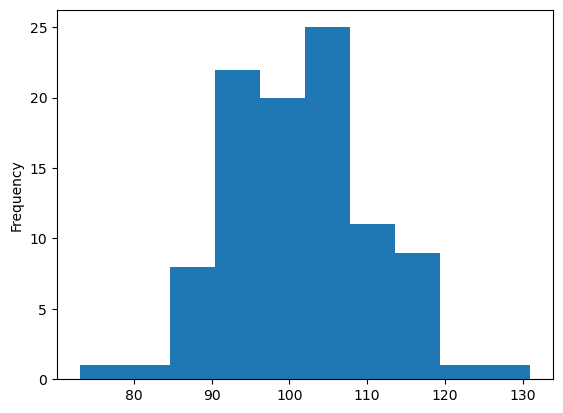

In [5]:
group.count()['error_message'].plot.hist();

# Calculate average response time by hour  

Determine the average response time for each hour of the day.

If we simply start by plotting the data, we can clearly see that the data is not normally distributed. The data below lacks a bell-shaped curve.

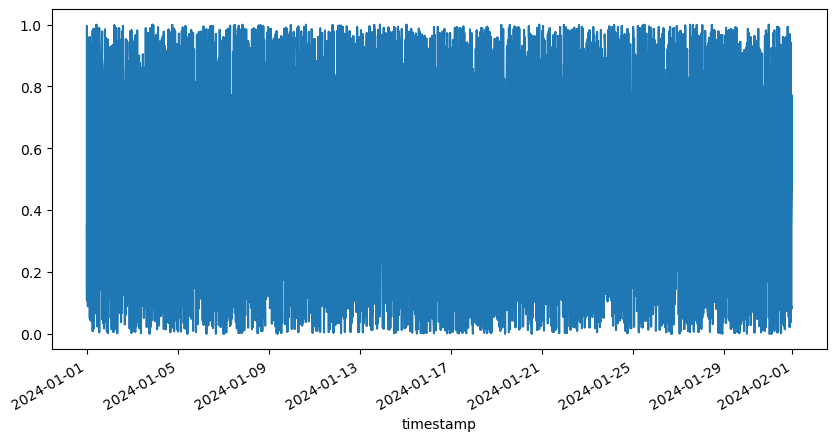

In [6]:
df.sort_values(by='timestamp').set_index('timestamp')['response_time'].plot(figsize=(10,5));

We can also plot the data using a histogram and again, this is not a normally distributed dataset.  

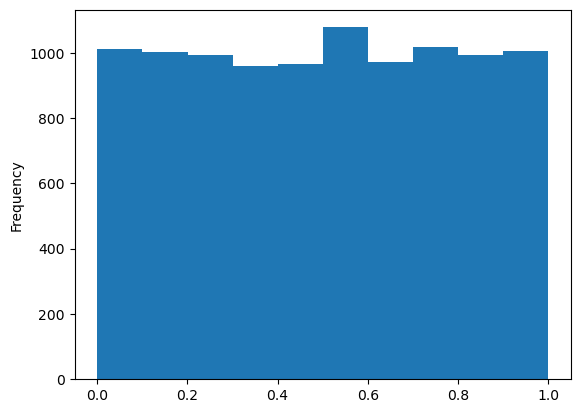

In [7]:
df.sort_values(by='timestamp').set_index('timestamp')['response_time'].plot.hist();

This means we cannot use the average and must use the median. Let's go!  

Notice how we are able to pull the hour from a date object.

In [8]:
# create the group object
group = df.groupby(df['timestamp'].dt.hour)

# get the median
group.median(numeric_only=True).head()

,response_time
timestamp,
0,0.497693
1,0.497187
2,0.524920
3,0.494640
4,0.506575


# Error Message Distribution  

Calculate the percentage distribution of each error message type (Timeout, Connection Refused, Packet Loss) in the dataset.  

As you might expect, for this dataset, the types of error messages are distributed pretty evenly.

In [9]:
df['error_message'].value_counts() / df['error_message'].count()

error_message
Connection Refused    0.3376
Timeout               0.3329
Packet Loss           0.3295
Name: count, dtype: float64

# Summary  

- The top 5 error-causing IP addresses were identified, with IP address 192.168.1.49 having the most errors (131).
- The average response time by hour was calculated, showing a varying response time throughout the day, with a median response time between 0.4826 and 0.5472.
- The error message distribution showed that the three error message types (Timeout, Connection Refused, Packet Loss) are fairly evenly distributed, with Connection Refused being the most frequent (33.76% of total errors).

By analyzing these results, the Cisco engineer can now focus on troubleshooting and optimizing the router's performance. This includes specifically targeting the top error-causing IP addresses and investigating the causes of the error messages.  

### Key Takeaways:  
- How to use the groupby function to group data by IP address and count error messages
- How to use the sort_values function to sort data and extract the top 5 error-causing IP addresses
- How to use the dt.hour attribute to extract the hour from a timestamp
- How to use the groupby function to group data by hour and calculate the median response time
- How to use the value_counts function to calculate the distribution of error message types

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>